<a href="https://colab.research.google.com/github/IlfGauhnith/TM/blob/main/Gensim_W2V_Embeddings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Treinando uma representação de Embeddings de texto com Gensim

O [Word2vec](https://en.wikipedia.org/wiki/Word2vec) é uma técnica muito popular de Processamento de Linguagem Natural que usa uma rede neural para aprender as representações vetoriais de palavras chamadas "embeddings" em um texto específico.

Neste tutorial, usaremos a excelente implementação do word2vec do pacote [gensim](https://radimrehurek.com/gensim/index.html) para criar nosso modelo word2vec. Usaremos o método de redução de dimensionalidade PCA no sklearn para visualizar os vetores de embeddings aprendidos.

In [ ]:
from gensim.models import Word2Vec
import multiprocessing

**Corpus**

In [ ]:
sentences = [
      ['van', 'gogh', 'nasceu', 'numa', 'família', 'de', 'classe', 'média', 'alta'],
      ['começou', 'a', 'desenhar', 'ainda', 'criança', 'sendo', 'descrito', 'como', 'alguém', 'sério', ',', 'quieto', 'e', 'pensativo'],
      ['vincent', 'willem', 'van', 'gogh', 'gostava', 'de', 'desenhar', 'em', 'zundert'],
      ['vincent', 'era', 'um', 'nome', 'comum', 'na', 'família', 'van', 'gogh'],
      ['era', 'o', 'filho', 'mais', 'velho', 'sobrevivente', 'de', 'anna', 'cornelia', 'carbentus', 'e', 'theodorus', '.']

]

## Treinando o Modelo

In [ ]:
model = Word2Vec(sentences,
                 sg=1, #0 para CBOW
                 vector_size=300,
                 workers=multiprocessing.cpu_count(),
                 epochs=5,
                 negative=5,
                 min_count=1)

**Vetor da palavra "vincent"**

In [ ]:
model.wv['vincent'][0:5]

array([ 0.00325309, -0.00325579, -0.00217741,  0.00091561,  0.00214418],
      dtype=float32)

**Armazenando todos vetores do Modelo**

In [ ]:
vocab = list(model.wv.key_to_index)
x = model.wv[vocab]

## Visualização
**Redução da Dimensionalidade**

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

dim = pca.fit_transform(x)

**Plot do Modelo**

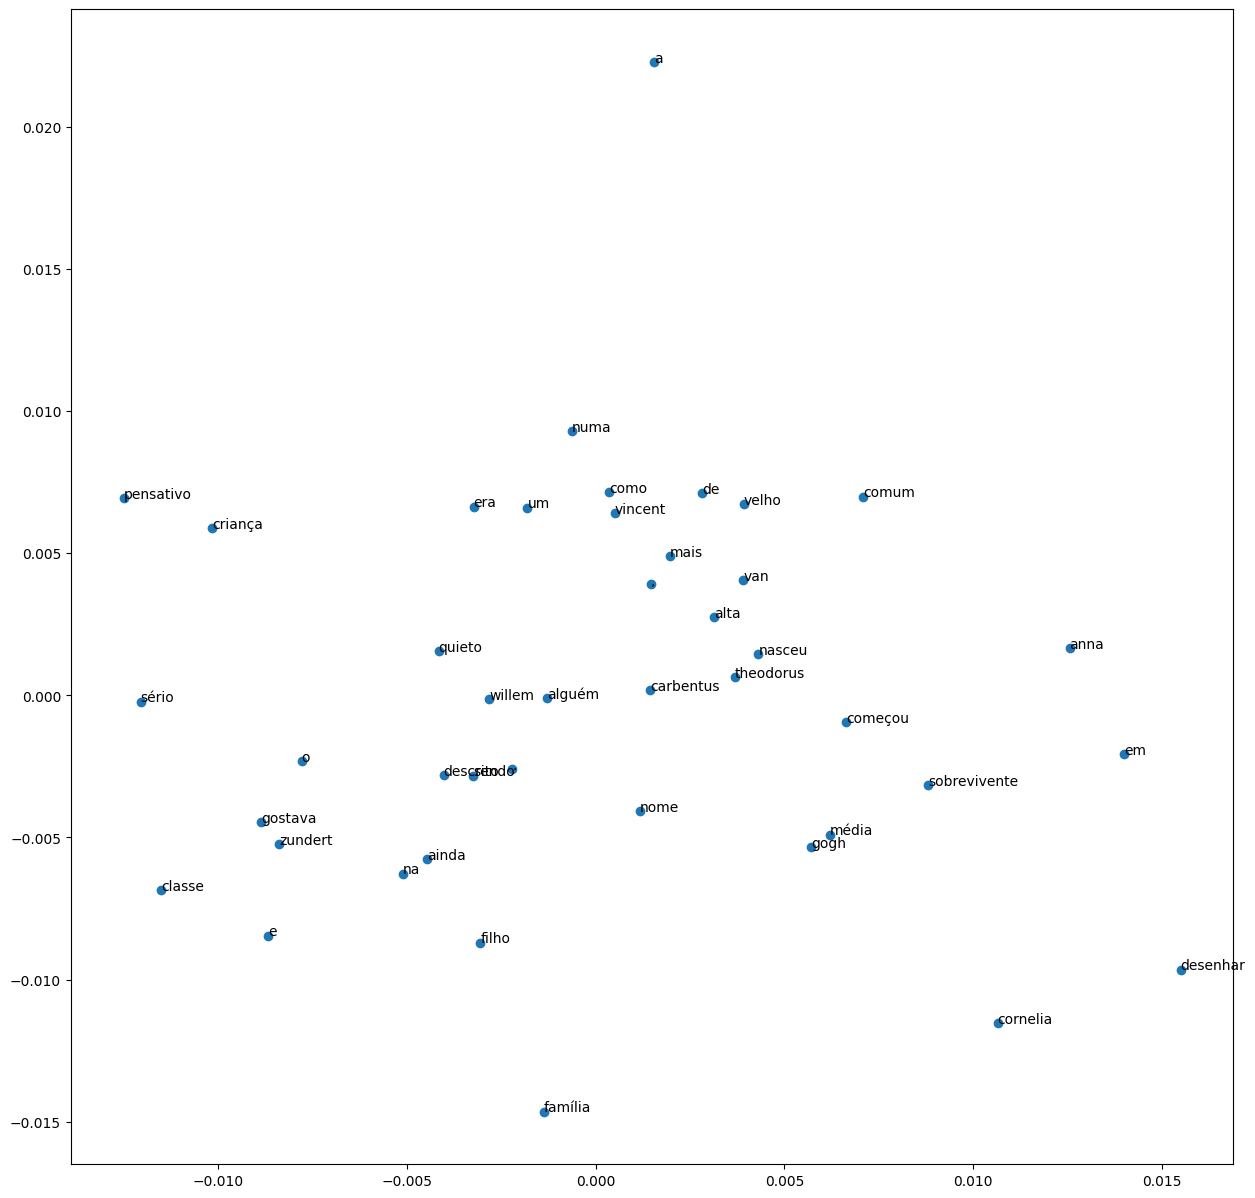

In [ ]:
from matplotlib import pyplot as plt

plt.figure(figsize=(15,15))
plt.scatter(dim[:, 0], dim[:, 1])

words = list(vocab)
for i, word in enumerate(words):
	plt.annotate(word, xy=(dim[i, 0], dim[i, 1]))
plt.show()

**Salvando os embeddings gerados**

In [ ]:
model.save('model.bin') # Salvando o modelo

model.wv.save_word2vec_format("model_skpg_300d.txt") # Salvando os vetores

**Carregando Modelo .bin**

In [ ]:
model_bin = Word2Vec.load('model.bin')

model_bin.wv['gogh'][0:5]

array([-2.7457548e-03,  3.1016585e-03, -6.7233981e-05, -6.5685116e-04,
        1.5323762e-03], dtype=float32)

**Carregando Modelo .txt**

In [ ]:
from gensim.models import KeyedVectors

model_txt = KeyedVectors.load_word2vec_format('model_skpg_300d.txt')

model_txt['gogh'][0:5]

array([-2.7457548e-03,  3.1016585e-03, -6.7233981e-05, -6.5685116e-04,
        1.5323762e-03], dtype=float32)

In [ ]:
model_txt.most_similar('gogh')

[('em', 0.11313171684741974),
 ('nasceu', 0.11211325973272324),
 ('ainda', 0.09804779291152954),
 ('descrito', 0.08316386491060257),
 ('começou', 0.0536402128636837),
 ('alguém', 0.05221336707472801),
 ('sobrevivente', 0.05052947998046875),
 ('pensativo', 0.05023965239524841),
 ('cornelia', 0.04099147394299507),
 ('família', 0.03994220495223999)]

## Visualizando no tensorboard

Execute a celula abaixo, e carregue os arquivos gerados no http://projector.tensorflow.org/

In [ ]:
import io

# Vector file, `\t` seperated the vectors and `\n` seperate the words
"""
0.1\t0.2\t0.5\t0.9
0.2\t0.1\t5.0\t0.2
0.4\t0.1\t7.0\t0.8
"""
out_v = io.open('vecs.tsv', 'w', encoding='utf-8')

# Meta data file, `\n` seperated word
"""
token1
token2
token3
"""
out_m = io.open('meta.tsv', 'w', encoding='utf-8')

# Write meta file and vector file
for index in range(len(model_txt.index_to_key)):
    word = model_txt.index_to_key[index]
    vec = model_txt.vectors[index]
    out_m.write(word + "\n")
    out_v.write(''.join([str(x) for x in vec]) + "\n")
out_v.close()
out_m.close()

# Exemplo: Embeddings de textos de Machado de Assis
Vamos utilizar o Word2Vec para produzir uma representação vetorial e visualização das palavras de textos de um corpus do livro de Memórias Póstumas de Brás Cubas, no corpus do NLTK

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('machado')

from nltk.corpus.machado import machado

print(machado.readme())

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package machado to /root/nltk_data...


ModuleNotFoundError: ignored

In [ ]:
import numpy as np
import os
from nltk.corpus import machado
import unicodedata

# Remove acentos e coloca palavras em minúsculas
def strip_accents_and_lower(s):
    return ''.join(c for c in unicodedata.normalize('NFD', s) if unicodedata.category(c) != 'Mn').lower()

machado_sents = map(lambda sent: list(map(strip_accents_and_lower, sent)), machado.sents())

# 'Executa' o mapeamento da lista
%time machado_sents = list(machado_sents)

Utilize as sentenças da variável `machado_sents` para treinar e visualizar o embedding produzido

In [ ]:
model_machado = Word2Vec(machado_sents,
                 sg=1, #0 para CBOW
                 size=300,
                 workers=multiprocessing.cpu_count(),
                 iter=5,
                 negative=5,
                 min_count=1)

Exiba as palavras mais próximas da lista abaixo

In [ ]:
# Exibe algumas palavras próximas daquelas contidas nesta lista
test_words = ['seja', 'foi', 'amou', 'aquele', 'foram', 'homem', 'rua', 'marcela']

# Embedding de uma palavra
def word_embedding(word):
    return model_machado.wv[word]

# Pega apenas as palavras a partir do resultado da função 'most_similar'
def strip_score(result):
    return [w for w, s in result]

# Lista as palavras mais próximas
def closest_words(word, num=5):
    word_score_pair = model_machado.wv.most_similar(word, topn=num)
    return strip_score(word_score_pair)

for w in test_words:
    print(w, closest_words(w))